In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
bv = pd.read_csv("../data/external/bill_version.csv", sep=";", encoding="latin1", parse_dates=True)
sessions =  pd.read_csv("../data/external/session.csv", sep=";", encoding="latin1", parse_dates=True)
bills =  pd.read_csv("../data/external/bill.csv", sep=";", encoding="latin1", parse_dates=True)
divs =  pd.read_csv("../data/external/division.csv", sep=";", encoding="latin1", parse_dates=True)
bill_leg_vote =  pd.read_csv("../data/external/bill_legislator_vote.csv", sep=";", encoding="latin1", parse_dates=True)
vote_rec_type =  pd.read_csv("../data/external/vote_recorded_type.csv", sep=";", encoding="latin1", parse_dates=True)

Asks from Tim:

* Political control of each chamber.
* states corresponding to each state_id
* Chamber_id? 1=Lower, 2=Upper?


Interesting questions and TODOS:

* How many unique bills are there?
* What time frame are we dealing with?
* What state has the most/least bills?
* What state passed the most legislation?
* Get a story together about the versioning process
* 

* 53 jurisdictions. created_at runs from 2018-2020

-- 247,565 unique bills
-- What is state_id = 53 with very very few bills passed.

In [3]:
#bills.head()

In [4]:
#bills1 = bills[bills["division_id"] == 30]
df = bills.merge(divs, left_on="division_id", right_on="id")
df[['abbr', "created_at"]].groupby("abbr").agg(["min", "max", "count"]).head()

created_at                           
                      min                  max count
abbr                                                
AK    2019-01-14 22:31:03  2020-05-19 00:13:54   664
AL    2019-01-11 17:49:08  2020-05-18 20:28:11  2421
AR    2018-11-21 21:31:04  2020-04-08 19:25:44  2037
AZ    2018-12-13 16:00:25  2020-05-20 02:20:38  2997
CA    2018-12-21 21:41:23  2020-08-04 06:32:55  5388

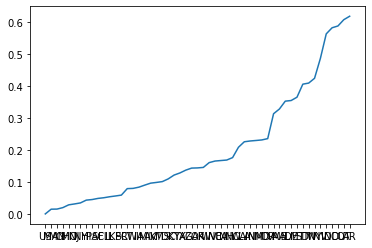

In [5]:
df = df[['abbr', 'passed_lower', 'passed_upper', 'signed']]
df = df.fillna(0)
for col in df.columns[1:]:
    mask = df[col]!=0
    df.loc[mask, col] = 1
df = df.astype({"abbr":str, "signed": int, "passed_upper": int, "passed_lower":int})
passage_agg = df.groupby('abbr').agg(["mean", "count"])
#sm = passage_agg['signed']['count'].sort_values(axis=0)
sm = passage_agg['signed']['mean'].sort_values(axis=0)


fig, ax = plt.subplots()
ax.plot(
    range(len(sm)),
    sm.values,
#    xlabel= "state_id"
)
plt.xticks(ticks = [])
ax.set_xticks(range(len(sm)))
ax.set_xticklabels(sm.index.values)
plt.label = 'xx'
plt.title = "title"
fig.sup_title = "Percent of bills that eventually pass"

matplotlib.rcParams['figure.figsize'] = [2,4]
plt.show()


In [6]:
bills.head()

,id,os_bill_id,name,state_id,chamber_id,session_id,title,created_at,updated_at,first_action,last_action,passed_lower,passed_upper,signed,division_id,bill_prefix,bill_number
0,830501,NaN,PC 101,40,2.0,475,Para ordenar a todo patrono notificar por escr...,2017-01-06 16:46:38,2020-06-26 03:32:36,2017-01-02 04:00:00,2020-06-25 04:00:00,NaN,NaN,NaN,156409,PC,101
1,830503,NaN,PC 103,40,2.0,475,Para enmendar el ArtÃ­culo 12 de la Ley NÃºm. ...,2017-01-06 16:46:38,2020-07-24 04:00:00,2017-01-02 04:00:00,2020-07-24 04:00:00,2019-11-06 04:00:00,2020-05-18 04:00:00,NaN,156409,PC,103
2,830509,NaN,PC 109,40,2.0,475,Para enmendar los artÃ­culos 1 y 3 de la Ley 3...,2017-01-06 16:46:40,2020-06-30 04:00:00,2017-01-02 04:00:00,2020-06-30 04:00:00,2019-03-04 04:00:00,2020-06-25 04:00:00,NaN,156409,PC,109
3,830510,NaN,PC 11,40,2.0,475,Para crear el Panel Voluntario de Abogados Com...,2017-01-06 16:46:40,2019-11-14 04:00:00,2017-01-02 04:00:00,2019-11-14 04:00:00,2017-05-08 05:00:00,2017-06-25 05:00:00,NaN,156409,PC,11
4,830522,NaN,PC 120,40,2.0,475,Para enmendar los ArtÃ­culos 9 y 12 de la Ley ...,2017-01-06 16:46:42,2019-08-01 16:59:33,2017-01-02 04:00:00,2019-08-01 16:59:33,2019-02-25 04:00:00,2019-06-24 04:00:00,2019-08-01 04:00:00,156409,PC,120


In [7]:
sessions.head()

,id,name,human_name,state_id,current,in_session,convened_str,convened_date,adjourned_str,adjourned_date,...,intro_upper_str,intro_upper_date,executive_deadline_str,executive_deadline_date,carryover_lower,carryover_upper,house_speaker_id,senate_president_id,term_id,division_id
0,1,2013rs,2013 Regular Session,1,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,1.0,1421
1,2,2015os,2015 Organizational Session,1,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,2.0,1421
2,3,2015rs,2015 Regular Session,1,0,0,"March 3, 2015",2015-03-03 00:00:00,"June 15, 2015",2015-06-15 00:00:00,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,2.0,1421
3,4,First Special Session 2012,2012 First Special Session,1,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,1421
4,5,2014rs,2014 Regular Session,1,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,1.0,1421


In [8]:
bv.groupby('mimetype').agg('count')

,id,name,os_doc_id,url,bill_id,mimetype_id,bill_printing_id,document_type_id,filesize,plain_filesize,bypass,created_at,updated_at
mimetype,,,,,,,,,,,,,
application/msword,31930,31930,0,31930,31930,31930,31930,1,27158,25734,31930,31930,31930
application/pdf,322119,322119,0,322119,322119,322062,322098,3,317268,316727,322119,322115,322119
application/rtf,4345,4345,0,4345,4345,4345,4345,0,3251,3240,4345,4345,4345
application/vnd.openxmlformats-officedocument.wordprocessingml.d,7798,7798,0,7798,7798,7798,7798,0,0,0,7798,7798,7798
application/vnd.wordperfect,2,2,0,2,2,2,2,0,0,0,2,2,2
text/html,248555,248555,0,248555,248555,248555,248553,0,240832,240750,248555,248551,248555
text/plain,597,597,0,597,597,597,597,0,597,597,597,597,597


In [9]:
bv[bv.mimetype=='text/html'].head()

,id,name,mimetype,os_doc_id,url,bill_id,mimetype_id,bill_printing_id,document_type_id,filesize,plain_filesize,bypass,created_at,updated_at
0,1528347,eh,text/html,NaN,https://www.gpo.gov/fdsys/pkg/BILLS-115hres3eh...,827210,2.0,284614.0,NaN,NaN,NaN,0,NaN,2019-01-04 04:00:04
2,1528349,eh,text/html,NaN,https://www.gpo.gov/fdsys/pkg/BILLS-115hres1eh...,827214,2.0,284615.0,NaN,NaN,NaN,0,NaN,2019-01-04 04:00:04
4,1528351,eh,text/html,NaN,https://www.gpo.gov/fdsys/pkg/BILLS-115hres2eh...,827208,2.0,284616.0,NaN,NaN,NaN,0,NaN,2019-01-04 04:00:05
6,1528363,eh,text/html,NaN,https://www.gpo.gov/fdsys/pkg/BILLS-115hres4eh...,827211,2.0,284617.0,NaN,NaN,NaN,0,NaN,2019-01-04 04:00:06
8,1852434,Senate: Prefiled and ordered printed; offered ...,text/html,NaN,http://lis.virginia.gov/cgi-bin/legp604.exe?18...,996267,2.0,NaN,NaN,NaN,NaN,0,2018-01-12 17:44:20,2020-05-01 23:32:05


In [10]:
divs

,id,identifier,name,abbr,has_data,division_type_id,division_level_id,same_as,parent_id,valid_through,valid_from,thread_id,timezone_id
0,651,ocd-division/country:us/state:ak,Alaska,AK,1,10,1,NaN,1.0,NaN,NaN,1,54.0
1,1421,ocd-division/country:us/state:al,Alabama,AL,1,10,1,NaN,1.0,NaN,NaN,1,88.0
2,4979,ocd-division/country:us/state:ar,Arkansas,AR,1,10,1,NaN,1.0,NaN,NaN,1,88.0
3,193348,ocd-division/country:us/territory:as,American Samoa,AS,0,35,1,NaN,1.0,NaN,NaN,1,NaN
4,9178,ocd-division/country:us/state:az,Arizona,AZ,1,10,1,NaN,1.0,NaN,NaN,1,164.0
5,11661,ocd-division/country:us/state:ca,California,CA,1,10,1,NaN,1.0,NaN,NaN,1,134.0
6,14029,ocd-division/country:us/state:co,Colorado,CO,1,10,1,NaN,1.0,NaN,NaN,1,97.0
7,17784,ocd-division/country:us/state:ct,Connecticut,CT,1,10,1,NaN,1.0,NaN,NaN,1,153.0
8,19134,ocd-division/country:us/state:dc,District of Columbia,DC,1,10,1,109.0,1.0,NaN,NaN,1,153.0
9,19135,ocd-division/country:us/state:de,Delaware,DE,1,10,1,NaN,1.0,NaN,NaN,1,153.0


In [11]:
party =  pd.read_csv("../data/external/party.csv", sep=";", encoding="latin1", parse_dates=True)
party = party.rename(columns={"id": "party_id"})
persons =  pd.read_csv("../data/external/person.csv", sep=";", encoding="latin1", parse_dates=True)

In [12]:
persons.head()


,id,full_name,first_name,middle_name,last_name,suffixes,nickname,same_as,party_id
0,1,George Washington,George,NaN,Washington,NaN,NaN,NaN,22.0
1,2,John Adams,John,NaN,Adams,NaN,NaN,NaN,23.0
2,3,Thomas Jefferson,Thomas,NaN,Jefferson,NaN,NaN,NaN,24.0
3,4,Aaron Burr,Aaron,NaN,Burr,Jr.,NaN,NaN,24.0
4,5,George Clinton,George,NaN,Clinton,NaN,NaN,NaN,24.0


In [13]:
party["is_liberal"] = 1
conservatives = set(["Republican", "Republican \n"])
mask = party["name"].isin(conservatives)
party.loc[mask, "is_liberal"] = 0
party.head()
persons= persons.merge(party[["party_id", "is_liberal"]], left_on = "party_id", right_on = "party_id")
#persons.head()
persons = persons.rename(columns = {"id": "person_id"})
#persons.head()

In [14]:
persons[["full_name", 'is_liberal']].groupby("is_liberal").agg("count")

,full_name
is_liberal,
0,5783
1,5020


In [15]:
sessions =  pd.read_csv("../data/external/session.csv", sep=";", encoding="latin1", parse_dates=True)

In [16]:
sessions[['house_speaker_id']].groupby('house_speaker_id').agg('count')

""
house_speaker_id


In [17]:
sessions.describe()

,id,state_id,current,in_session,is_special,prefile_deadline_str,prefile_deadline_date,intro_lower_str,intro_upper_str,executive_deadline_str,executive_deadline_date,carryover_lower,carryover_upper,house_speaker_id,senate_president_id,term_id,division_id
count,657.000000,657.000000,657.000000,657.000000,656.000000,0.0,0.0,0.0,0.0,0.0,0.0,657.000000,657.000000,0.0,0.0,645.000000,657.000000
mean,333.235921,27.254186,0.115677,0.009132,0.326220,NaN,NaN,NaN,NaN,NaN,NaN,0.028919,0.024353,NaN,NaN,144.012403,87381.415525
std,194.308218,16.416666,0.320081,0.095199,0.469186,NaN,NaN,NaN,NaN,NaN,NaN,0.167708,0.154260,NaN,NaN,94.549947,63719.341349
min,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,1.000000,1.000000
25%,165.000000,13.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,65.000000,19761.000000
50%,329.000000,26.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,138.000000,86935.000000
75%,503.000000,43.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,219.000000,143469.000000
max,670.000000,53.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,316.000000,192572.000000


In [18]:
bill_leg_vote.tail()

,id,bill_id,vote_id,person_id,vote_recorded_type_id
11133485,13639358,1348637,601847,8506,1
11133486,13639359,1348637,601847,398,2
11133487,13639360,1348637,601847,427,1
11133488,13639361,1348637,601847,400,1
11133489,13639362,1348637,601847,523,1


In [19]:
vote_rec_type

,id,name
0,6,excused
1,1,no
2,5,not voting
3,3,other
4,4,present
5,2,yes


In [20]:
vote_rec_type = vote_rec_type.rename(columns={"id": "vote_recorded_type_id"})
#vote_rec_type.head()
blv = bill_leg_vote.merge(vote_rec_type, left_on = 'vote_recorded_type_id', right_on = "vote_recorded_type_id")

In [21]:
blv = blv.merge(persons[["person_id", "is_liberal"]], on = "person_id")
blv.describe()


,id,bill_id,vote_id,person_id,vote_recorded_type_id,is_liberal
count,1.107046e+07,1.107046e+07,1.107046e+07,1.107046e+07,1.107046e+07,1.107046e+07
mean,7.434983e+06,9.152045e+05,3.819158e+05,4.796675e+03,1.977246e+00,4.406560e-01
std,3.928409e+06,2.841402e+05,1.180513e+05,3.066481e+03,4.506588e-01,4.964658e-01
min,1.000000e+00,4.493000e+03,2.854500e+04,7.900000e+01,1.000000e+00,0.000000e+00
25%,3.975372e+06,7.725160e+05,2.814320e+05,2.093000e+03,2.000000e+00,0.000000e+00
50%,7.772088e+06,9.226220e+05,3.768820e+05,5.086000e+03,2.000000e+00,0.000000e+00
75%,1.084426e+07,1.142501e+06,4.821770e+05,6.726000e+03,2.000000e+00,1.000000e+00
max,1.363936e+07,1.350708e+06,6.018470e+05,2.204600e+04,6.000000e+00,1.000000e+00


In [22]:
votes =  pd.read_csv("../data/external/vote.csv", sep=";", encoding="latin1", parse_dates=True)
votes.head()

,id,division_id,session_id,bill_id,chamber_id,motion,date,vote_type_id,yes,no,other
0,1,1421.0,1,6,1,Motion to Read a Third Time and Pass adopted R...,2013-05-02 00:00:00,1.0,21,1,13.0
1,2,1421.0,1,6,2,Motion to Read a Third Time and Pass adopted R...,2013-05-20 00:00:00,1.0,64,2,38.0
2,3,1421.0,1,7,1,Reed motion to Adopt adopted Roll Call 606,2013-04-25 00:00:00,1.0,27,0,8.0
3,4,1421.0,1,7,1,Reed motion to Adopt adopted Roll Call 607,2013-04-25 00:00:00,1.0,25,0,10.0
4,5,1421.0,1,7,1,Reed motion to Adopt adopted Roll Call 608,2013-04-25 00:00:00,1.0,22,0,13.0


In [23]:
votes['vote_count'] = votes['yes'] + votes['no'] + votes['other']
votes.head()

,id,division_id,session_id,bill_id,chamber_id,motion,date,vote_type_id,yes,no,other,vote_count
0,1,1421.0,1,6,1,Motion to Read a Third Time and Pass adopted R...,2013-05-02 00:00:00,1.0,21,1,13.0,35.0
1,2,1421.0,1,6,2,Motion to Read a Third Time and Pass adopted R...,2013-05-20 00:00:00,1.0,64,2,38.0,104.0
2,3,1421.0,1,7,1,Reed motion to Adopt adopted Roll Call 606,2013-04-25 00:00:00,1.0,27,0,8.0,35.0
3,4,1421.0,1,7,1,Reed motion to Adopt adopted Roll Call 607,2013-04-25 00:00:00,1.0,25,0,10.0,35.0
4,5,1421.0,1,7,1,Reed motion to Adopt adopted Roll Call 608,2013-04-25 00:00:00,1.0,22,0,13.0,35.0


In [24]:
chamber_size = votes[['division_id', 'chamber_id', 'vote_count']].groupby(['division_id', "chamber_id"]).agg(['max'])
chamber_size = chamber_size.reset_index()
chamber_size.columns = ['division_id', 'chamber_id', 'chamber_size']
chamber_size.head()

,division_id,chamber_id,chamber_size
0,1.0,1,100.0
1,1.0,2,438.0
2,651.0,1,20.0
3,651.0,2,60.0
4,1421.0,1,35.0


In [25]:
votes[votes['division_id'] == 192572]

,id,division_id,session_id,bill_id,chamber_id,motion,date,vote_type_id,yes,no,other,vote_count
197789,197790,192572.0,331,698334,2,H07 Recommended Amend and Do Pass,2011-01-18 00:00:00,1.0,7,2,0.0,9.0
197793,197794,192572.0,331,698333,2,Passed 3rd Reading,2011-02-17 00:00:00,1.0,50,9,1.0,60.0
197794,197795,192572.0,331,698337,2,Motion to Do Pass Failed,2011-01-21 00:00:00,1.0,3,6,0.0,9.0
197795,197796,192572.0,331,698336,2,H06 Recommended Amend and Do Pass,2011-01-20 00:00:00,1.0,9,0,0.0,9.0
197796,197797,192572.0,331,698335,2,H06 Recommended Do Pass,2011-01-17 00:00:00,1.0,9,0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
588458,593560,192572.0,639,1303227,1,SF0001VT002: Did Not Override Line Item Veto 1...,2020-03-13 02:30:54,1.0,11,16,3.0,30.0
588459,593561,192572.0,639,1303227,1,SF0001VT004: Did Not Override Line Item Veto 1...,2020-03-13 02:48:28,1.0,13,14,3.0,30.0
588463,593565,192572.0,639,1305720,2,SF0138JC002: H Adopted SF0138JC002: 46-10-4-0-0,2020-03-13 02:55:10,1.0,46,10,4.0,60.0
588564,593666,192572.0,639,1301906,2,SF0002VT001: Line Item Veto Override 45-9-6-0-0,2020-03-13 03:59:41,1.0,45,9,6.0,60.0


In [26]:
lib_vote_count = blv[['bill_id', 'vote_id', 'is_liberal']].groupby(['bill_id', 'vote_id']).agg(['sum', 'count'])
lib_vote_count = lib_vote_count.reset_index()
lib_vote_count.columns = ['bill_id', 'vote_id', 'n_lib_votes', 'total_votes']
lib_vote_count.head()

,bill_id,vote_id,n_lib_votes,total_votes
0,4493,209038,15,29
1,4493,209041,5,16
2,4493,209042,5,16
3,4494,272441,5,16
4,4494,272442,5,16


In [27]:
votes[votes['id'] == 209038]

,id,division_id,session_id,bill_id,chamber_id,motion,date,vote_type_id,yes,no,other,vote_count
209037,209038,651.0,10,4493,2,Shall CSHB 1(EDA) am pass the House?,2015-02-12 19:00:00,1.0,32,2,6.0,40.0


In [28]:
#lib_vote_count[lib_vote_count['']]

In [29]:
bill_leg_vote[bill_leg_vote['vote_id'] == 209038].shape

(30, 5)

In [30]:
df = lib_vote_count.merge(votes, left_on = 'vote_id', right_on = "id")

In [31]:
import numpy as np
df['matching_count'] = df['total_votes'] == df['vote_count']

In [32]:
### bill_leg_votes is a dumpster fire

In [33]:
df.head()

,bill_id_x,vote_id,n_lib_votes,total_votes,id,division_id,session_id,bill_id_y,chamber_id,motion,date,vote_type_id,yes,no,other,vote_count,matching_count
0,4493,209038,15,29,209038,651.0,10,4493,2,Shall CSHB 1(EDA) am pass the House?,2015-02-12 19:00:00,1.0,32,2,6.0,40.0,False
1,4493,209041,5,16,209041,651.0,10,4493,1,Shall Amendment No. 1 be adopted?,2015-04-06 20:00:00,1.0,5,15,0.0,20.0,False
2,4493,209042,5,16,209042,651.0,10,4493,1,Shall SENATE CS FOR CS FOR HOUSE BILL\nNO. 1(S...,2015-04-06 20:00:00,1.0,19,1,0.0,20.0,False
3,4494,272441,5,16,272441,651.0,10,4494,1,Shall Amendment No. 2 be adopted?,2016-04-17 01:00:00,1.0,5,15,0.0,20.0,False
4,4494,272442,5,16,272442,651.0,10,4494,1,Shall SENATE CS FOR CS FOR HOUSE BILL\nNO. 100...,2016-04-17 01:00:00,1.0,14,6,0.0,20.0,False


In [34]:
df.shape

(307117, 17)

In [35]:
df2 = df[['bill_id_x', "vote_id", "n_lib_votes", "total_votes", 'id', 'division_id', 'session_id', 'chamber_id', 'yes', 'no', 'other', 'vote_count', 'matching_count' ]]

In [36]:
df2.head()

,bill_id_x,vote_id,n_lib_votes,total_votes,id,division_id,session_id,chamber_id,yes,no,other,vote_count,matching_count
0,4493,209038,15,29,209038,651.0,10,2,32,2,6.0,40.0,False
1,4493,209041,5,16,209041,651.0,10,1,5,15,0.0,20.0,False
2,4493,209042,5,16,209042,651.0,10,1,19,1,0.0,20.0,False
3,4494,272441,5,16,272441,651.0,10,1,5,15,0.0,20.0,False
4,4494,272442,5,16,272442,651.0,10,1,14,6,0.0,20.0,False


In [37]:
perf_matches = df2[['session_id', 'matching_count']].groupby('session_id').agg('max')

In [38]:
perf_matches.mean()

matching_count    0.294686
dtype: float64

In [39]:
sessions.shape

(657, 33)

In [40]:
bill_leg_vote.head()

,id,bill_id,vote_id,person_id,vote_recorded_type_id
0,1,349728,97964,4018,2
1,2,349728,97964,4019,2
2,4,349728,97964,4020,2
3,6,349728,97964,4021,2
4,7,349728,97964,4039,2


In [41]:
votes.head()

,id,division_id,session_id,bill_id,chamber_id,motion,date,vote_type_id,yes,no,other,vote_count
0,1,1421.0,1,6,1,Motion to Read a Third Time and Pass adopted R...,2013-05-02 00:00:00,1.0,21,1,13.0,35.0
1,2,1421.0,1,6,2,Motion to Read a Third Time and Pass adopted R...,2013-05-20 00:00:00,1.0,64,2,38.0,104.0
2,3,1421.0,1,7,1,Reed motion to Adopt adopted Roll Call 606,2013-04-25 00:00:00,1.0,27,0,8.0,35.0
3,4,1421.0,1,7,1,Reed motion to Adopt adopted Roll Call 607,2013-04-25 00:00:00,1.0,25,0,10.0,35.0
4,5,1421.0,1,7,1,Reed motion to Adopt adopted Roll Call 608,2013-04-25 00:00:00,1.0,22,0,13.0,35.0


In [42]:
len(bills.session_id.unique())

108

In [43]:
uniq_session_df = pd.DataFrame(bills.session_id.unique(), columns=['session_id'])

In [44]:
uniq_session_df.merge(votes, on='session_id')

,session_id,id,division_id,bill_id,chamber_id,motion,date,vote_type_id,yes,no,other,vote_count
0,475,305787,156409.0,841003,1,VotaciÃ³n Final,2017-01-09 05:00:00,1.0,22,8,0.0,30.0
1,475,305788,156409.0,841003,2,VotaciÃ³n Final,2017-01-10 05:00:00,1.0,31,17,0.0,48.0
2,475,305789,156409.0,841240,1,VotaciÃ³n Final,2017-01-09 05:00:00,1.0,27,3,0.0,30.0
3,475,305790,156409.0,841241,1,VotaciÃ³n Final,2017-01-09 05:00:00,1.0,30,0,0.0,30.0
4,475,305791,156409.0,841711,2,VotaciÃ³n Final,2017-01-09 05:00:00,1.0,32,1,16.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...
170927,666,601819,173459.0,1348003,2,Reported from Appropriations (13-Y 9-N),2020-09-25 12:03:08,2.0,13,9,0.0,22.0
170928,666,601820,173459.0,1348067,2,Reported from Appropriations with substitute (...,2020-09-25 12:03:12,2.0,13,9,0.0,22.0
170929,666,601821,173459.0,1348071,2,Reported from Appropriations (13-Y 9-N),2020-09-25 12:03:15,2.0,13,9,0.0,22.0
170930,666,601822,173459.0,1348075,2,Reported from Appropriations (13-Y 8-N),2020-09-25 12:03:19,2.0,13,8,1.0,22.0


In [45]:
# 1/3 of the votes data pertains to the text we have
votes.shape

(596676, 12)

In [46]:
df3 = uniq_session_df.merge(df2, on='session_id')
perf_matches = df3[['session_id', 'matching_count']].groupby('session_id').agg('max')

In [47]:
perf_matches

,matching_count
session_id,
436,True
469,False
520,True
525,False
552,True
...,...
640,True
641,True
645,False


In [48]:
bills.shape

(247565, 17)

In [49]:
votes.shape

(596676, 12)

In [50]:
bills.head(n=1)

,id,os_bill_id,name,state_id,chamber_id,session_id,title,created_at,updated_at,first_action,last_action,passed_lower,passed_upper,signed,division_id,bill_prefix,bill_number
0,830501,NaN,PC 101,40,2.0,475,Para ordenar a todo patrono notificar por escr...,2017-01-06 16:46:38,2020-06-26 03:32:36,2017-01-02 04:00:00,2020-06-25 04:00:00,NaN,NaN,NaN,156409,PC,101


In [51]:
votes.head(n=1)

,id,division_id,session_id,bill_id,chamber_id,motion,date,vote_type_id,yes,no,other,vote_count
0,1,1421.0,1,6,1,Motion to Read a Third Time and Pass adopted R...,2013-05-02 00:00:00,1.0,21,1,13.0,35.0


In [52]:
bill_votes = bills.merge(votes, left_on="id", right_on="bill_id", how='left')

In [53]:
bill_votes.shape

(358485, 29)

In [54]:
bill_votes.head(n=1)

,id_x,os_bill_id,name,state_id,chamber_id_x,session_id_x,title,created_at,updated_at,first_action,...,session_id_y,bill_id,chamber_id_y,motion,date,vote_type_id,yes,no,other,vote_count
0,830501,NaN,PC 101,40,2.0,475,Para ordenar a todo patrono notificar por escr...,2017-01-06 16:46:38,2020-06-26 03:32:36,2017-01-02 04:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
vote_counts = bill_votes[['id_x', 'vote_count']].groupby('id_x').agg('count')
sum(vote_counts.vote_count == 0)

192469

In [63]:
bill_votes[bill_votes['id_x'] == 830501]

,id_x,os_bill_id,name,state_id,chamber_id_x,session_id_x,title,created_at,updated_at,first_action,...,session_id_y,bill_id,chamber_id_y,motion,date,vote_type_id,yes,no,other,vote_count
0,830501,NaN,PC 101,40,2.0,475,Para ordenar a todo patrono notificar por escr...,2017-01-06 16:46:38,2020-06-26 03:32:36,2017-01-02 04:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
print("Percent of bills never voted on: %{:.2f}".format(100*sum(vote_counts.vote_count == 0)/vote_counts.shape[0]))

Percent of bills never voted on: %77.74


====================================================

* Inferring the liberal/conservative makeup of each chamber:

In [78]:
bill_votes.head(n=1)

,id_x,os_bill_id,name,state_id,chamber_id_x,session_id_x,title,created_at,updated_at,first_action,...,session_id_y,bill_id,chamber_id_y,motion,date,vote_type_id,yes,no,other,vote_count
0,830501,NaN,PC 101,40,2.0,475,Para ordenar a todo patrono notificar por escr...,2017-01-06 16:46:38,2020-06-26 03:32:36,2017-01-02 04:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
uniq_session_df = uniq_session_df.rename(columns={"session_id": "uniq_session_id"})
df = uniq_session_df.merge(bill_votes, left_on = 'uniq_session_id', right_on="session_id_x", how="left")

In [84]:
df.shape

(358485, 30)

In [90]:
df.uniq_session_id.isna().values.sum()

0

In [91]:
df.head(n=1)

,uniq_session_id,id_x,os_bill_id,name,state_id,chamber_id_x,session_id_x,title,created_at,updated_at,...,session_id_y,bill_id,chamber_id_y,motion,date,vote_type_id,yes,no,other,vote_count
0,475,830501,NaN,PC 101,40,2.0,475,Para ordenar a todo patrono notificar por escr...,2017-01-06 16:46:38,2020-06-26 03:32:36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
session_vote_count = df[['uniq_session_id', 'vote_count']].groupby('uniq_session_id').agg('count')
xx = sessions.rename(columns={"id": 'uniq_session_id'})
session_vote_count = session_vote_count.merge(xx[['uniq_session_id', 'division_id']], on='uniq_session_id')

In [126]:
divs.head()
xx2 = divs.rename(columns={'id':"division_id"})
session_vote_count = session_vote_count.merge(xx2, on="division_id", how='left')

In [127]:
session_vote_count.head()

,uniq_session_id,vote_count,division_id,identifier,name,abbr,has_data,division_type_id,division_level_id,same_as,parent_id,valid_through,valid_from,thread_id,timezone_id
0,436,0,137807,ocd-division/country:us/state:ok,Oklahoma,OK,1,10,1,NaN,1.0,NaN,NaN,1,88.0
1,469,0,65837,ocd-division/country:us/state:ma,Massachusetts,MA,1,10,1,NaN,1.0,NaN,NaN,1,153.0
2,475,1608,156409,ocd-division/country:us/state:pr,Puerto Rico,PR,1,10,1,NaN,1.0,NaN,NaN,1,168.0
3,520,2539,109651,ocd-division/country:us/state:nj,New Jersey,NJ,1,10,1,NaN,1.0,NaN,NaN,1,153.0
4,525,2,14029,ocd-division/country:us/state:co,Colorado,CO,1,10,1,NaN,1.0,NaN,NaN,1,97.0


In [132]:
session_vote_count.sort_values('abbr')

,uniq_session_id,vote_count,division_id,identifier,name,abbr,has_data,division_type_id,division_level_id,same_as,parent_id,valid_through,valid_from,thread_id,timezone_id
53,610,704,651,ocd-division/country:us/state:ak,Alaska,AK,1,10,1,NaN,1.0,NaN,NaN,1,54.0
51,608,2451,1421,ocd-division/country:us/state:al,Alabama,AL,1,10,1,NaN,1.0,NaN,NaN,1,88.0
56,613,37,1421,ocd-division/country:us/state:al,Alabama,AL,1,10,1,NaN,1.0,NaN,NaN,1,88.0
64,621,449,1421,ocd-division/country:us/state:al,Alabama,AL,1,10,1,NaN,1.0,NaN,NaN,1,88.0
89,650,0,4979,ocd-division/country:us/state:ar,Arkansas,AR,1,10,1,NaN,1.0,NaN,NaN,1,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,609,882,190272,ocd-division/country:us/state:wv,West Virginia,WV,1,10,1,NaN,1.0,NaN,NaN,1,153.0
57,614,194,190272,ocd-division/country:us/state:wv,West Virginia,WV,1,10,1,NaN,1.0,NaN,NaN,1,153.0
82,639,1556,192572,ocd-division/country:us/state:wy,Wyoming,WY,1,10,1,NaN,1.0,NaN,NaN,1,97.0
95,656,0,192572,ocd-division/country:us/state:wy,Wyoming,WY,1,10,1,NaN,1.0,NaN,NaN,1,97.0


In [134]:
divs.groupby('division_level_id').agg('count')

,id,identifier,name,abbr,has_data,division_type_id,same_as,parent_id,valid_through,valid_from,thread_id,timezone_id
division_level_id,,,,,,,,,,,,
1,57,57,57,57,57,57,1,56,0,0,57,53


In [140]:
sessions[sessions.division_id == 651]

,id,name,human_name,state_id,current,in_session,convened_str,convened_date,adjourned_str,adjourned_date,...,intro_upper_str,intro_upper_date,executive_deadline_str,executive_deadline_date,carryover_lower,carryover_upper,house_speaker_id,senate_president_id,term_id,division_id
7,8,27,27th Legislature (2011-2012),2,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,201.0,651
8,9,28,28th Legislature (2013-2014),2,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,202.0,651
9,10,29,29th Legislature (2015-2016),2,0,0,NaN,2016-01-19 00:00:00,NaN,2016-07-18 00:00:00,...,NaN,NaN,NaN,NaN,1,0,NaN,NaN,203.0,651
468,479,30,30th Legislature (2017-2018),2,0,0,NaN,2018-01-16 01:00:39,NaN,2018-04-15 23:59:59,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,204.0,651
598,610,31,31st Legislature (2019-2020),2,1,0,NaN,2020-01-15 01:03:08,NaN,2020-05-06 23:59:59,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,310.0,651
